In [189]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [166]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [167]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [168]:
x_train = x_train / 255.
x_test = x_test / 255. 

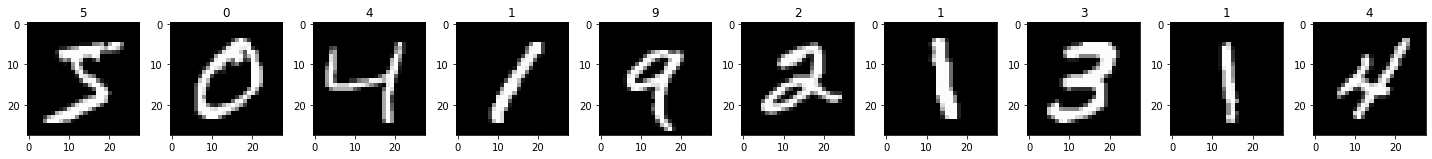

In [169]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20,6), tight_layout=True)

for i in range(10):
  ax[i].imshow(x_train[i], cmap='gray')
  ax[i].set_title(y_train[i])

In [170]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [171]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid', name='encoded'),

    tf.keras.layers.UpSampling2D(size=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.UpSampling2D(size=(2,2)),
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1,1), padding='same', activation='sigmoid', name='decoded'),
])

In [172]:
cnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 encoded (MaxPooling2D)      (None, 7, 7, 8)           0         
                                                                 
 up_sampling2d_18 (UpSamplin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 16)      

In [173]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy')

In [174]:
history = cnn_model.fit(x_train, x_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.1528 - val_loss: 0.0913
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0877 - val_loss: 0.0840
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0834 - val_loss: 0.0811
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0812 - val_loss: 0.0794
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0792 - val_loss: 0.0775
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0776 - val_loss: 0.0762
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0765 - val_loss: 0.0754
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0758 - val_loss: 0.0748
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0753 - val_loss: 0.0744
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0749 - val_lo

Text(0.5, 0, 'Epochs')

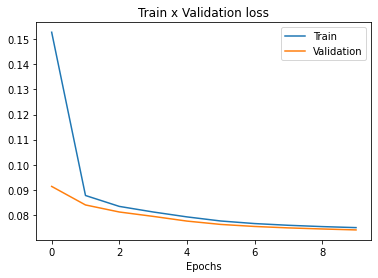

In [175]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Train', 'Validation'])
plt.title('Train x Validation loss')
plt.xlabel('Epochs')

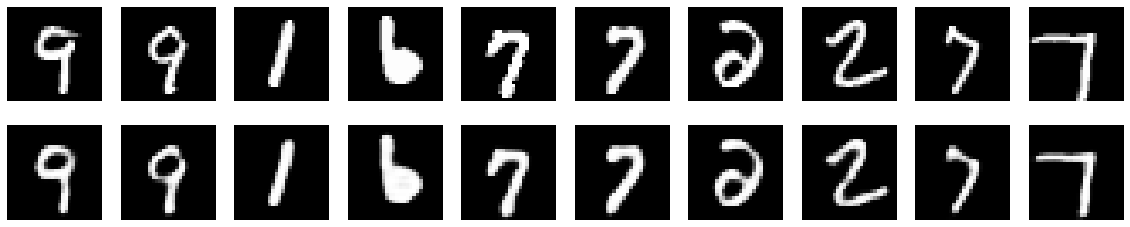

In [176]:
n_imgs = 10
random_imgs = np.random.choice(range(x_test.shape[0]), size=n_imgs)
img_true = x_test[random_imgs]
img_pred = cnn_model.predict(img_true)

plt.figure(figsize=(20, 4))
for i in range(n_imgs):
  plt.subplot(2, n_imgs, i + 1)
  plt.imshow(img_true[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(2, n_imgs, i + 1 + n_imgs)
  plt.imshow(img_pred[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

In [182]:
encoder = tf.keras.models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer(name='encoded').output)
x_test_encoded = encoder.predict(x_test)

In [184]:
x_test_encoded.shape

(10000, 7, 7, 8)

In [222]:
encodings = x_test_encoded.reshape(x_test_encoded.shape[0], -1)

In [224]:
encodings.shape

(10000, 392)

In [223]:
retriver = NearestNeighbors(n_neighbors=5, n_jobs=-1)
retriver.fit(encodings)

NearestNeighbors(n_jobs=-1)

In [227]:
distances, indices = retriver.kneighbors(np.expand_dims(encodings[0], axis=0))

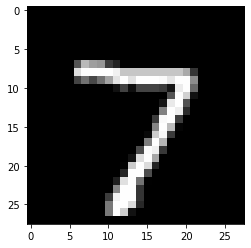

In [231]:
plt.imshow(x_test[0].squeeze(), cmap='gray')

In [233]:
indices

array([[   0, 4800, 4083, 8815, 4049]])

In [234]:
plt.imshow(encodings[4083].reshape(28,28), cmg='gray')

ValueError: ignored

In [232]:

for i in indices[1:]:
  plt.imshow(encodings[i].reshape(28,28), cmg='gray')